# Betrachtung weiterer möglicher Features aus OSM

In diesem Notebook untersuchen wir mögliche weitere Features aus OSM und überprüfen ob wir diese eventuell für unser Modelltraining nutzen können.

## 1. Anzahl der Fahrspuren (`lanes`)

In [17]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
cycle_net_berlin = gpd.read_file("../../data/cycle_net_berlin_cleaned.geojson")

In [11]:
# Extrahieren der 'lanes'-Spalte
lanes_data = cycle_net_berlin[['lanes', 'geometry']]

print("Anzahl der Fahrspuren (lanes):")
print(lanes_data['lanes'].value_counts(dropna=False))

Anzahl der Fahrspuren (lanes):
lanes
None    143047
2        14123
3         4440
1         4240
4         1689
5          297
6           43
7            2
Name: count, dtype: int64


In [12]:
# Sicherstellen, dass die Spalte 'lanes' existiert
if 'lanes' not in cycle_net_berlin.columns:
    cycle_net_berlin['lanes'] = None  # Initialisiere als None, falls 'lanes' nicht vorhanden ist

In [13]:
# Konvertieren der 'lanes'-Spalte zu numerischen Werten
cycle_net_berlin['lanes'] = pd.to_numeric(cycle_net_berlin['lanes'], errors='coerce')

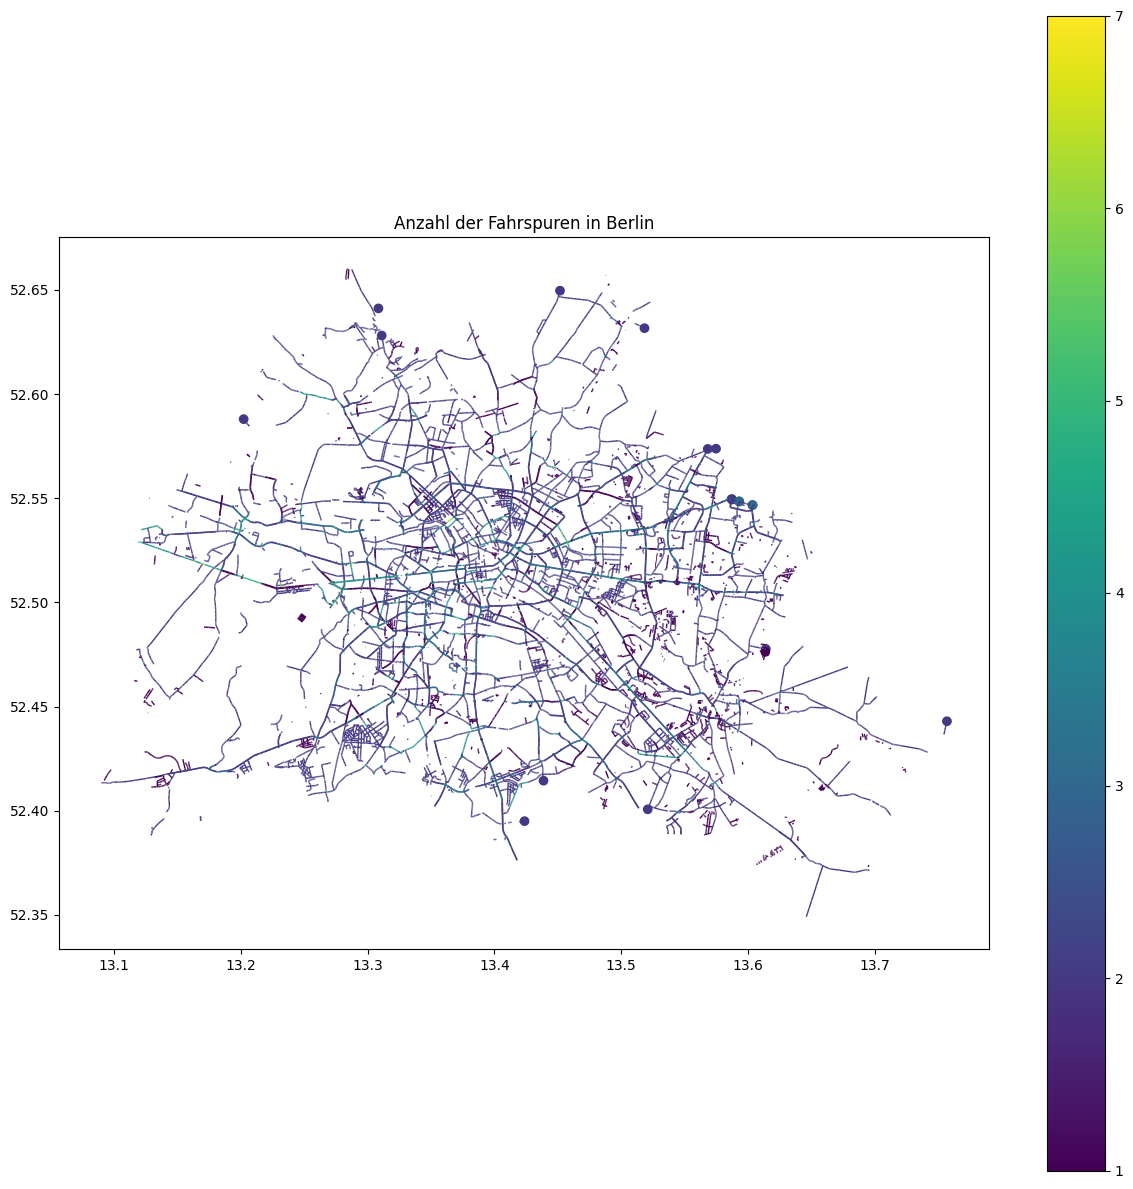

In [18]:
# Plotten des Straßennetzwerks, gefärbt nach der Anzahl der Fahrspuren

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
base = cycle_net_berlin.plot(ax=ax, column='lanes', legend=True, cmap='viridis', linewidth=1)
plt.title("Anzahl der Fahrspuren in Berlin")
plt.show()

In [19]:
# Anzahl der Straßen ohne Lanes-Wert zählen
straßen_ohne_lanes = cycle_net_berlin['lanes'].isna().sum()

print(f"Anzahl der Straßen ohne Lanes-Wert: {straßen_ohne_lanes}")

#Anteil der Straßen ohne Lanes-Wert in Prozent
gesamtanzahl_straßen = len(cycle_net_berlin)
anteil_ohne_lanes = (straßen_ohne_lanes / gesamtanzahl_straßen) * 100

print(f"Anteil der Straßen ohne Lanes-Wert: {anteil_ohne_lanes:.2f}%")

Anzahl der Straßen ohne Lanes-Wert: 143047
Anteil der Straßen ohne Lanes-Wert: 85.21%


### Schlussfolgerung: 

- Die Anzahl der getaggten Straßenbreiten ist sehr gering: unter 15% der Segmente haben eine Angabe zur Breite.
- Daher ahben uns entschieden dieses Feature nicht in unseren Datensatz zu integrieren. 

## 2. Straßenbreite (`width`)

In [20]:
straßenbreite = cycle_net_berlin[['width']]

In [31]:
# Anzahl der Straßen mit Breitenangaben zählen
straßen_mit_breite = cycle_net_berlin['width'].notna().sum()
straßen_ohne_breite = cycle_net_berlin['width'].isna().sum()

print(f"Anzahl der Straßen mit Breitenangaben: {straßen_mit_breite}")
print(f"Anzahl der Straßen ohne Breitenangaben: {straßen_ohne_breite}")

Anzahl der Straßen mit Breitenangaben: 16528
Anzahl der Straßen ohne Breitenangaben: 151353


In [22]:
# Optional: Anzeige der ersten paar Einträge mit Breitenangabe
print("Beispiele für Straßen mit Breitenangabe: ")
print(cycle_net_berlin[cycle_net_berlin['width'].notna()][["highway", "width"]].head())

Beispiele für Straßen mit Breitenangabe: 
        highway width
2   residential     5
21  residential   5.1
22  residential     6
40  residential     9
63  residential     7


In [30]:
# Anzahl der Straßen ohne width-Wert zählen
straßen_ohne_breite = cycle_net_berlin['width'].isna().sum()

print(f"Anzahl der Straßen ohne Breiten-Angabe: {straßen_ohne_breite}")

#Anteil der Straßen ohne width-Angabe in Prozent
gesamtanzahl_straßen = len(cycle_net_berlin)
anteil_ohne_breite = (straßen_ohne_breite / gesamtanzahl_straßen) * 100

print(f"Anteil der Straßen ohne Breiten-Angabe: {anteil_ohne_breite:.2f}%")

Anzahl der Straßen ohne Breiten-Angabe: 151353
Anteil der Straßen ohne Breiten-Angabe: 90.15%


### Schlussfolgerung: 

- Die Anzahl der getaggten Straßenbreiten ist sehr gering: nur unter 10% der Segmente haben eine Angabe zur Breite.
- Daher ahben uns entschieden dieses Feature nicht in unseren Datensatz zu integrieren. 